In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv("../data/raw/job_offer.tsv", delimiter='\t', encoding="utf-8")

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (16,35,36,39,40,41,42,91) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
data.describe()

,Unnamed: 0,ANNUAL_MAXIMUM_SALARY,ANNUAL_MINIMUM_SALARY,CONTRACT_DURATION,DEGREE_SUBJECT_AREA_CODE_1,DEGREE_SUBJECT_AREA_CODE_2,DESKTOP_TOOLS_LEV_CODE_1,DESKTOP_TOOLS_LEV_CODE_2,EXPERIENCE_MAX_DURATION,EXPERIENCE_MIN_DURATION,...,ROME_PROFESSION_CODE,SALARY_SUPPLEMENT_CODE_1,SALARY_SUPPLEMENT_CODE_2,TRAVEL_FREQUENCY_CODE,TRAVEL_TYPE_CODE,TRAVEL_TYPE_COMMENT,WEEKLY_WORKING_HOURS,WEEKLY_WORKING_MINUTES,WORKFORCE,_id
count,52700.00000,29252.000000,45158.000000,28172.000000,19839.000000,2345.000000,20.000000,22.000000,0.0,34824.000000,...,52700.000000,18746.000000,4125.000000,8837.000000,5235.000000,0.0,51430.000000,1873.000000,52700.000000,52700.000000
mean,26349.50000,24861.277349,19550.398118,7.342148,27762.451535,27591.939446,2.000000,2.090909,NaN,2.838588,...,16009.532638,1.215086,6.329939,2.551545,1.452149,NaN,32.455318,34.608115,10.196869,52290.010455
std,15213.32393,34648.759421,21354.521903,10.232703,15446.008368,14402.336837,0.561951,0.610159,NaN,2.028780,...,5895.365840,2.373194,2.633900,1.260886,0.831042,NaN,8.361617,10.499195,15.478680,69447.097187
min,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,NaN,1.000000,...,10201.000000,0.000000,1.000000,0.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.000000
25%,13174.75000,18500.000000,17763.200000,3.000000,21538.000000,21599.000000,2.000000,2.000000,NaN,1.000000,...,11999.000000,0.000000,6.000000,1.000000,1.000000,NaN,35.000000,30.000000,1.000000,13175.750000
50%,26349.50000,21840.000000,18444.000000,6.000000,31854.000000,31624.000000,2.000000,2.000000,NaN,2.000000,...,14811.000000,0.000000,7.000000,3.000000,1.000000,NaN,35.000000,30.000000,3.000000,26350.500000
75%,39524.25000,27300.000000,21600.000000,7.000000,42752.000000,42050.000000,2.000000,2.000000,NaN,3.000000,...,18029.000000,1.000000,8.000000,4.000000,2.000000,NaN,35.000000,45.000000,12.000000,39525.250000
max,52699.00000,1000000.000000,1000000.000000,98.000000,71854.000000,71454.000000,3.000000,3.000000,NaN,48.000000,...,39046.000000,10.000000,10.000000,4.000000,4.000000,NaN,56.000000,59.000000,99.000000,211581.000000


In [43]:
data.head()

,Unnamed: 0,ACTIVITY_CODE,ACTIVITY_NAME,ANNUAL_MAXIMUM_SALARY,ANNUAL_MINIMUM_SALARY,CITY_CODE,CITY_NAME,CONTINENT_CODE,CONTINENT_NAME,CONTRACT_DURATION,...,WORKING_CONDITION_CODE,WORKING_CONDITION_COMMENT,WORKING_CONDITION_NAME,WORKING_HOURS_TYPE_CODE,WORKING_HOURS_TYPE_COMMENT,WORKING_HOURS_TYPE_NAME,WORKING_LOCATION_NAME,WORKING_LOCATION_TYPE_CODE,WORKING_LOCATION_TYPE_NAME,_id
0,0,6420Z,Activités des sociétés holding,NaN,22800.0,85243,BREM SUR MER,NaN,NaN,2.0,...,AUT,NaN,Autre,NOR,NaN,Horaires normaux,BREM SUR MER,CO,Une commune,33615
1,1,7820Z,Activités des agences de travail temporaire,19000.0,18000.0,13206,MARSEILLE 06,NaN,NaN,4.0,...,AUT,NaN,Autre,NOR,NaN,Horaires normaux,MARSEILLE 06,CO,Une commune,33619
2,2,7820Z,Activités des agences de travail temporaire,NaN,21000.0,47001,AGEN,NaN,NaN,2.0,...,AUT,NaN,Autre,NOR,NaN,Horaires normaux,AGEN,CO,Une commune,33620
3,3,6202A,Conseil en systèmes et logiciels informatiques,NaN,NaN,NaN,NaN,00,FRANCE,NaN,...,AUT,NaN,Autre,NaN,NaN,NaN,France,PA,Un pays,33621
4,4,7820Z,Activités des agences de travail temporaire,20020.0,17763.2,56091,JOSSELIN,NaN,NaN,3.0,...,AUT,NaN,Autre,NOR,NaN,Horaires normaux,JOSSELIN,CO,Une commune,33622


In [44]:
data.dtypes

Unnamed: 0                      int64
ACTIVITY_CODE                  object
ACTIVITY_NAME                  object
ANNUAL_MAXIMUM_SALARY         float64
ANNUAL_MINIMUM_SALARY         float64
CITY_CODE                      object
CITY_NAME                      object
CONTINENT_CODE                 object
CONTINENT_NAME                 object
CONTRACT_DURATION             float64
CONTRACT_DUR_UNIT_CODE         object
CONTRACT_DUR_UNIT_NAME         object
CONTRACT_NATURE_CODE           object
CONTRACT_NATURE_NAME           object
CONTRACT_TYPE_CODE             object
CONTRACT_TYPE_NAME             object
COUNTRY_CODE                   object
COUNTRY_NAME                   object
CREATION_DATE                  object
DEGREE_DIPLOMA_NAME_1          object
DEGREE_DIPLOMA_NAME_2          object
DEGREE_REQUIRED_CODE_1         object
DEGREE_REQUIRED_CODE_2         object
DEGREE_REQUIRED_NAME_1         object
DEGREE_REQUIRED_NAME_2         object
DEGREE_SUBJECT_AREA_CODE_1    float64
DEGREE_SUBJE

In [45]:
count = data.count()
count

Unnamed: 0                    52700
ACTIVITY_CODE                 52700
ACTIVITY_NAME                 52700
ANNUAL_MAXIMUM_SALARY         29252
ANNUAL_MINIMUM_SALARY         45158
CITY_CODE                     49464
CITY_NAME                     49438
CONTINENT_CODE                  462
CONTINENT_NAME                  462
CONTRACT_DURATION             28172
CONTRACT_DUR_UNIT_CODE        28173
CONTRACT_DUR_UNIT_NAME        28173
CONTRACT_NATURE_CODE          52700
CONTRACT_NATURE_NAME          52696
CONTRACT_TYPE_CODE            52700
CONTRACT_TYPE_NAME            52700
COUNTRY_CODE                  52698
COUNTRY_NAME                  52626
CREATION_DATE                 52700
DEGREE_DIPLOMA_NAME_1          6788
DEGREE_DIPLOMA_NAME_2           880
DEGREE_REQUIRED_CODE_1        19839
DEGREE_REQUIRED_CODE_2         2345
DEGREE_REQUIRED_NAME_1        19839
DEGREE_REQUIRED_NAME_2         2345
DEGREE_SUBJECT_AREA_CODE_1    19839
DEGREE_SUBJECT_AREA_CODE_2     2345
DEGREE_SUBJECT_AREA_NAME_1  

In [49]:
data[count[count >= 52700].index]

,Unnamed: 0,ACTIVITY_CODE,ACTIVITY_NAME,CONTRACT_NATURE_CODE,CONTRACT_TYPE_CODE,CONTRACT_TYPE_NAME,CREATION_DATE,DISABLED_ACCESSIBILITY,EM_INTERVIEW_MODALITY_CODE,EXPERIENCE_CODE,...,STATUS_CODE,STATUS_NAME,WAGE_UNIT_NAME,WORKFORCE,WORKING_CONDITION_CODE,WORKING_CONDITION_NAME,WORKING_LOCATION_NAME,WORKING_LOCATION_TYPE_CODE,WORKING_LOCATION_TYPE_NAME,_id
0,0,6420Z,Activités des sociétés holding,E1,SAI,Contrat travail saisonnier,06/03/17,N,MEL,E,...,EC,En cours,Euros,0,AUT,Autre,BREM SUR MER,CO,Une commune,33615
1,1,7820Z,Activités des agences de travail temporaire,E1,CDD,Contrat à durée déterminée,07/03/17,N,MEL,E,...,EC,En cours,Euros,1,AUT,Autre,MARSEILLE 06,CO,Une commune,33619
2,2,7820Z,Activités des agences de travail temporaire,E1,MIS,Travail intérimaire,28/02/17,N,TEL,E,...,EC,En cours,Euros,2,AUT,Autre,AGEN,CO,Une commune,33620
3,3,6202A,Conseil en systèmes et logiciels informatiques,NS,CCE,Profession commerciale,10/01/17,N,MEL,D,...,EC,En cours,Euros,1,AUT,Autre,France,PA,Un pays,33621
4,4,7820Z,Activités des agences de travail temporaire,E1,MIS,Travail intérimaire,06/03/17,N,URL,E,...,EC,En cours,Euros,1,AUT,Autre,JOSSELIN,CO,Une commune,33622
5,5,7820Z,Activités des agences de travail temporaire,E1,MIS,Travail intérimaire,09/01/17,N,URL,E,...,EC,En cours,Euros,2,AUT,Autre,NANTES,CO,Une commune,33623
6,6,5610A,Restauration traditionnelle,E1,SAI,Contrat travail saisonnier,17/03/17,N,MEL,E,...,EC,En cours,Euros,31,AUT,Autre,ANNECY,CO,Une commune,33625
7,7,5610A,Restauration traditionnelle,E1,SAI,Contrat travail saisonnier,17/03/17,N,MEL,E,...,EC,En cours,Euros,31,AUT,Autre,ANNECY,CO,Une commune,33626
8,8,5610A,Restauration traditionnelle,E1,SAI,Contrat travail saisonnier,17/03/17,N,MEL,E,...,EC,En cours,Euros,31,AUT,Autre,ANNECY,CO,Une commune,33627
9,9,5610A,Restauration traditionnelle,E1,SAI,Contrat travail saisonnier,17/03/17,N,MEL,E,...,EC,En cours,Euros,31,AUT,Autre,ANNECY,CO,Une commune,33628


In [50]:
type_code = {"CDI": [data["CONTRACT_TYPE_CODE"][data["CONTRACT_TYPE_CODE"] == "CDI"].count()],
"CDD": [data["CONTRACT_TYPE_CODE"][data["CONTRACT_TYPE_CODE"] == "CDD"].count()],
"SAI": [data["CONTRACT_TYPE_CODE"][data["CONTRACT_TYPE_CODE"] == "SAI"].count()],
"MIS": [data["CONTRACT_TYPE_CODE"][data["CONTRACT_TYPE_CODE"] == "MIS"].count()],
"CCE": [data["CONTRACT_TYPE_CODE"][data["CONTRACT_TYPE_CODE"] == "CCE"].count()]}
type_code = pd.DataFrame(type_code)

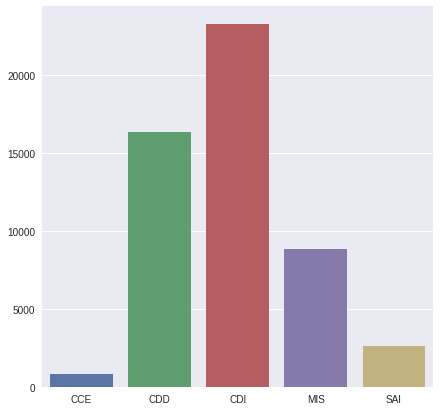

In [51]:
plt.figure(figsize=(7, 7))
sns.barplot(data=type_code)
plt.show()